# 导入数据集

In [1]:
import numpy as np 
import pandas as pd 
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("./new.csv",encoding='gbk',low_memory=False)
pd.set_option('display.max_columns',None)
df.columns
df.describe()
df

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,131.00,2,1,1,1,高 26,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,132.38,2,2,1,2,高 22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,198.00,3,2,1,3,中 4,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,底 21,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,81.00,2,1,1,1,中 6,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318846,https://bj.lianjia.com/chengjiao/BJYZ92311192....,BJYZ92311192,116.546899,39.755236,1111027377053,2016-06-10,1.0,8,350.0,20580,170.07,3,2,1,2,中 5,4.0,2003,1,6,0.333,0.0,1.0,0.0,3,36545.0
318847,https://bj.lianjia.com/chengjiao/BJYZ92320171....,BJYZ92320171,116.497474,39.810115,1111027377957,2016-06-10,NaN,1,108.8,31006,35.09,1,0,1,1,中 24,1.0,2009,1,6,0.222,1.0,0.0,1.0,3,54282.0
318848,https://bj.lianjia.com/chengjiao/BJYZ92324217....,BJYZ92324217,116.497256,39.804081,1111027380056,2016-06-05,1.0,2,359.0,35138,102.17,2,2,1,2,中 7,4.0,2000,3,6,0.500,1.0,1.0,0.0,3,46927.0
318849,https://bj.lianjia.com/chengjiao/BJYZ92333313....,BJYZ92333313,116.501794,39.799347,1111027377054,2016-06-12,NaN,4,720.0,40373,178.34,4,2,1,2,中 5,4.0,2003,4,2,0.500,0.0,1.0,0.0,3,54842.0


# 数据清洗

In [2]:

#去除重复数据
df[df['url'].duplicated()]
df[df['id'].duplicated()]
#经纬度 
df.Lng.value_counts()
df.Lat.value_counts()
#社区ID
df.Cid.value_counts()
#交易时间 -提取出年份
df.tradeTime.value_counts()
df['tradeyear']=df.tradeTime.astype(str).str[0:4] 
df.tradeyear.value_counts()#去掉数据较少的年份从11年-17统计
df.drop(df[df['tradeyear']<'2011'].index, inplace=True)
df.tradeyear.value_counts()
df.drop(df[df['tradeyear']>'2017'].index, inplace=True)
df.tradeyear.value_counts()#转换时间格式
df['tradeTime'] = pd.to_datetime(df['tradeTime'])
#上架多久  有很多空值
df.DOM.value_counts()
#关注交易人数
#df.followers.value_counts()
#总价  有过低值
df.totalPrice.value_counts() 
df.drop(df[df['totalPrice']<50].index, inplace=True)#总价低于50W的房子不应该是正常的
df.totalPrice=df.totalPrice.astype('int64')
df.totalPrice.value_counts()
#单价 有过低值
df.price.value_counts()#单价低于1000的房子不应该是正常的
df.drop(df[df['price']<1000].index, inplace=True)
df.totalPrice.value_counts()
df.describe()
#大小 平方数
df.square.value_counts()
# 卧室 有异常值
df.livingRoom.value_counts()
df=df.loc[df.livingRoom!='#NAME?',:]
df.livingRoom=df.livingRoom.astype('int64')
df.livingRoom.value_counts()
#浴室 有未知值 和过大的值
df.bathRoom.value_counts() 
df.bathRoom=df.bathRoom.astype('int64')
# 会客室 有异常中文字符 异常值
df.drawingRoom.value_counts() 
df.drawingRoom=df.drawingRoom.astype('int64')
#厨房
df.kitchen.value_counts()
#楼层 有未知值 有混合类型
df.floor.value_counts() 
df['floorType']=df.floor.apply(lambda df:df.split()[0])#添加楼层类型
df=df.loc[(df.floorType!='未知')&(df.floorType!='钢混结构')&(df.floorType!='混合结构'),:]
df.floorType.value_counts()
df.floor=df.floor.apply(lambda df:df.split()[1])
df.floor=df.floor.astype('int64')
df.floor.value_counts()
df.floorType=df.floorType.replace('顶','4')
df.floorType=df.floorType.replace('高','3')
df.floorType=df.floorType.replace('中','2')
df.floorType=df.floorType.replace('低','1')
df.floorType=df.floorType.replace('底','0')
df.floorType=df.floorType.astype('int64')
#建造时间 有未知值和 特别早的
df.constructionTime.value_counts()#将'constructionTime'列中的未知项跳过,只考虑1950到2016年建成的房子:
df.constructionTime=df.constructionTime.replace('未知','9999').astype('int64')
df=df.loc[(df.constructionTime>=1950)&(df.constructionTime<=2016),:]
df.constructionTime.value_counts()
#装修条件 只保留1234
df.renovationCondition.value_counts() 
#建筑结构只保留123456
df.buildingStructure.value_counts() 
# 梯户比
df.ladderRatio.value_counts() 
#电梯  要改成整数
df.elevator.value_counts() 
df.elevator=df.elevator.astype('int64')
#五年政策 要改成整数
df.fiveYearsProperty.value_counts()
df.fiveYearsPropertye=df.fiveYearsProperty.astype('int64')
#地铁
df.subway.value_counts()
df['subway']=df.subway.astype('int64')
#行政区
df.district.value_counts()
df.district=df.district.astype('int64')
#所在小区价格
df.communityAverage.value_counts()#小区均价 空值
df[df['communityAverage'].isnull()]
df.drop(df[df['communityAverage'].isnull()].index, inplace=True)
df.communityAverage=df.communityAverage.astype('int64')
#建筑类型   只保留1 2 3 4
df.buildingType.value_counts() 
df[df['buildingType'].isnull()]
df.drop(df[df['buildingType'].isnull()].index, inplace=True)
df.buildingType=df.buildingType.astype('int64')

#重设索引
df=df.reset_index(drop=True)
#保存
#df.floorType.value_counts()
df

/Users/dongxiang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-2-3847aaf04a00>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['floorType']=df.floor.apply(lambda df:df.split()[0])#添加楼层类型
<ipython-input-2-3847aaf04a00>:77: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.fiveYearsPro

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,tradeyear,floorType
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415,31680,131.00,2,1,1,1,26,1,2005,3,6,0.217,1,0.0,1,7,56021,2016,3
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575,43436,132.38,2,2,1,2,22,1,2004,4,6,0.667,1,1.0,0,7,71539,2016,3
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030,52021,198.00,3,2,1,3,4,4,2005,3,6,0.500,1,0.0,0,7,48160,2016,2
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297,22202,134.00,3,1,1,1,21,1,2008,1,6,0.273,1,0.0,0,6,51238,2016,0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392,48396,81.00,2,1,1,1,6,4,1960,2,2,0.333,0,1.0,1,1,62588,2016,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295190,https://bj.lianjia.com/chengjiao/BJYZ92303482....,BJYZ92303482,116.546899,39.755236,1111027377053,2016-06-09,1.0,8,355,26491,134.20,3,2,1,2,9,3,2009,4,6,0.500,1,1.0,0,3,36545,2016,2
295191,https://bj.lianjia.com/chengjiao/BJYZ92311192....,BJYZ92311192,116.546899,39.755236,1111027377053,2016-06-10,1.0,8,350,20580,170.07,3,2,1,2,5,4,2003,1,6,0.333,0,1.0,0,3,36545,2016,2
295192,https://bj.lianjia.com/chengjiao/BJYZ92320171....,BJYZ92320171,116.497474,39.810115,1111027377957,2016-06-10,NaN,1,108,31006,35.09,1,0,1,1,24,1,2009,1,6,0.222,1,0.0,1,3,54282,2016,2
295193,https://bj.lianjia.com/chengjiao/BJYZ92324217....,BJYZ92324217,116.497256,39.804081,1111027380056,2016-06-05,1.0,2,359,35138,102.17,2,2,1,2,7,4,2000,3,6,0.500,1,1.0,0,3,46927,2016,2


In [3]:
#保存
df.to_csv('data.csv')

# ------------------------------------------------------

In [4]:
df.describe()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,floorType
count,295195.000000,295195.000000,2.951950e+05,151022.000000,295195.000000,295195.000000,295195.000000,295195.000000,295195.000000,295195.000000,295195.000000,295195.000000,295195.000000,295195.000000,295195.00000,295195.000000,295195.000000,2.951950e+05,295195.000000,295195.000000,295195.000000,295195.000000,295195.000000,295195.000000
mean,116.418800,39.949469,1.126004e+12,29.541312,17.237446,350.423855,43989.407216,82.639736,2.011230,1.171476,0.995823,1.182286,13.165314,3.027717,1999.17461,2.621369,4.420471,6.819722e+01,0.570707,0.653290,0.602592,6.751534,63733.415593,2.099632
std,0.111122,0.091398,1.319905e+12,50.427687,34.738513,224.009826,21688.050253,35.688414,0.764417,0.511549,0.096551,0.421871,7.759447,1.266563,8.77278,1.305773,1.907750,2.605360e+04,0.494976,0.475923,0.489363,2.813194,22128.867919,1.101748
min,116.072514,39.627030,1.111027e+12,1.000000,0.000000,50.000000,2541.000000,7.370000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1950.00000,1.000000,1.000000,1.400000e-02,0.000000,0.000000,0.000000,1.000000,10847.000000,0.000000
25%,116.345810,39.892777,1.111027e+12,1.000000,0.000000,206.000000,28363.000000,57.920000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1994.00000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,46578.000000,1.000000
50%,116.416780,39.934527,1.111027e+12,7.000000,5.000000,295.000000,39135.000000,73.930000,2.000000,1.000000,1.000000,1.000000,11.000000,4.000000,2001.00000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,59060.000000,2.000000
75%,116.477171,40.003018,1.111027e+12,38.000000,19.000000,428.000000,54348.000000,98.200000,2.000000,1.000000,1.000000,1.000000,19.000000,4.000000,2006.00000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,75858.000000,3.000000
max,116.711337,40.252758,1.184867e+14,1677.000000,1143.000000,4900.000000,150000.000000,640.000000,8.000000,5.000000,3.000000,7.000000,63.000000,4.000000,2016.00000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,183109.000000,4.000000


In [5]:
#correlations
corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending=False)

price                  1.000000
communityAverage       0.684309
totalPrice             0.639905
renovationCondition    0.295379
followers              0.260201
subway                 0.229830
DOM                    0.215050
elevator               0.052686
buildingStructure      0.045522
district               0.038547
floor                  0.028396
kitchen                0.019290
ladderRatio            0.001097
fiveYearsProperty      0.000642
Cid                    0.000176
floorType             -0.039325
Lat                   -0.050542
buildingType          -0.052272
livingRoom            -0.074329
bathRoom              -0.079820
drawingRoom           -0.129057
Lng                   -0.158487
square                -0.168504
constructionTime      -0.208604
Name: price, dtype: float64

<AxesSubplot:xlabel='tradeyear', ylabel='price'>

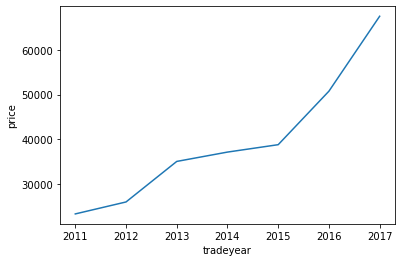

In [6]:
#tradeyear & price
df_year=df.groupby('tradeyear').price.mean()
sns.lineplot(data=df_year)

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='communityAverage', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='communityAverage'>,
        <AxesSubplot:xlabel='communityAverage', ylabel='communityAverage'>]],
      dtype=object)

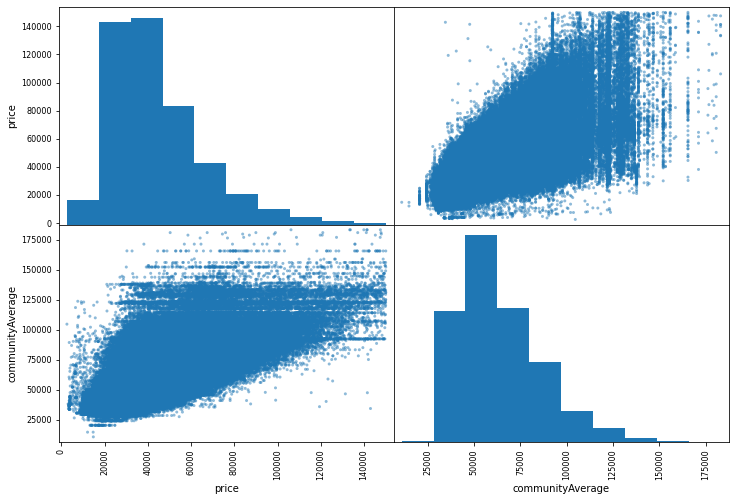

In [7]:

from pandas.plotting import scatter_matrix
attributes = ["price", "communityAverage"]
scatter_matrix(df[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='Lng', ylabel='Lat'>

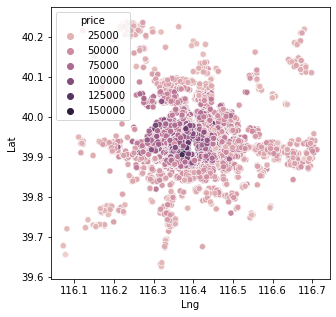

In [8]:
#Location & price
df['tradeyear']=df.tradeTime.astype(str).str[0:4] 
df_2016=df.loc[df.tradeyear=='2016',:]
plt.figure(figsize=(5,5))
sns.scatterplot(x=df_2016['Lng'],y=df_2016['Lat'],hue=df_2016['price'])

/Users/dongxiang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Amount_of_Housing_Traded')

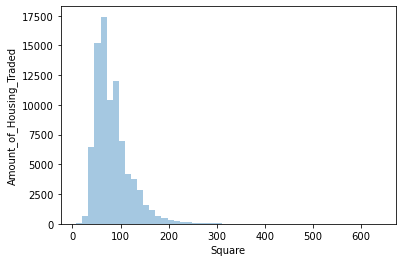

In [9]:
sns.distplot(a = df_2016['square'], kde = False)  
plt.xlabel('Square') 
plt.ylabel('Amount_of_Housing_Traded')

Text(0, 0.5, 'Followers')

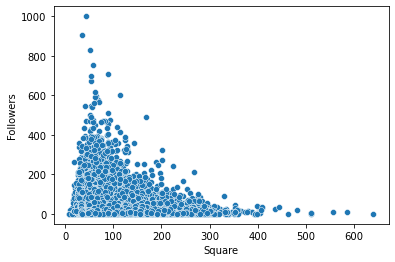

In [10]:
sns.scatterplot(x = df_2016['square'], y = df_2016['followers'])
plt.xlabel('Square')
plt.ylabel('Followers')

/Users/dongxiang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


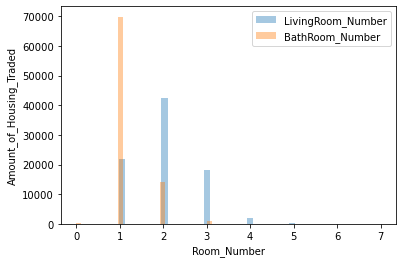

In [11]:
sns.distplot(a = df_2016['livingRoom'], kde = False, label = 'LivingRoom_Number')
sns.distplot(a = df_2016['bathRoom'], kde = False, label = 'BathRoom_Number')
plt.xlabel('Room_Number')
plt.ylabel('Amount_of_Housing_Traded')
plt.legend()

Text(0, 0.5, 'Mean_Price')

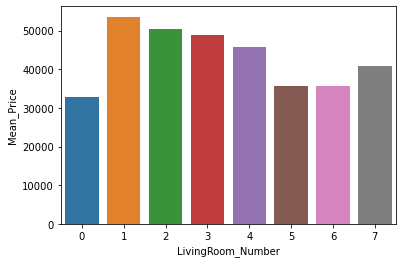

In [12]:
livingRoomNum = df_2016.groupby('livingRoom').price.mean()
sns.barplot(x = livingRoomNum.index, y = livingRoomNum)
plt.xlabel('LivingRoom_Number')
plt.ylabel('Mean_Price')

/Users/dongxiang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Amount_of_Housing_Traded')

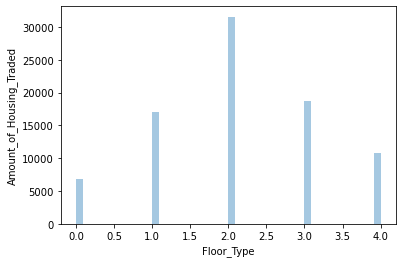

In [13]:
sns.distplot(a = df_2016['floorType'], kde = False) 
plt.xlabel('Floor_Type')
plt.ylabel('Amount_of_Housing_Traded')

In [14]:
# Xiang Dong
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

In [15]:
houses = pd.read_csv("./data.csv")
cols = ['constructionTime', 'renovationCondition', 'elevator', 'price']
df3 = houses[cols]
df3.head()

/Users/dongxiang/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,constructionTime,renovationCondition,elevator,price
0,2005,3,1,31680
1,2004,4,1,43436
2,2005,3,1,52021
3,2008,1,1,22202
4,1960,2,0,48396


#### First, let's look at some distribution.

/Users/dongxiang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


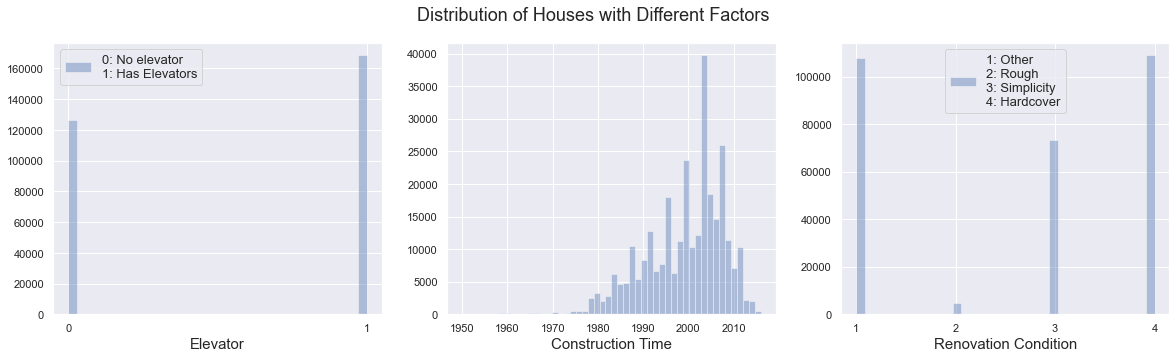

In [16]:
# create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5))
fig.suptitle('Distribution of Houses with Different Factors', fontsize = 18)

# first - Elevator
sns.distplot(a = df3['elevator'],kde = False, ax = ax1)
ax1.set_xlabel('Elevator', fontsize = 15)
ax1.set_xticks([0,1])
ax1.legend(labels = ["0: No elevator\n1: Has Elevators"], fontsize = 13)

# second - Construction Time
sns.distplot(a = df3['constructionTime'],kde = False, ax= ax2)
ax2.set_xlabel('Construction Time', fontsize = 15)

# third - Renovation Condition
sns.distplot(a = df3['renovationCondition'],kde = False, ax = ax3)
ax3.set_xticks([1,2,3,4])
ax3.set_xlabel('Renovation Condition', fontsize = 15)
ax3.legend(labels = ["1: Other\n2: Rough\n3: Simplicity\n4: Hardcover"], fontsize = 13)

#### Now let's see the correlation of these factors with price.

Text(0, 0.5, 'Price')

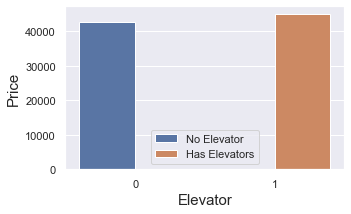

In [17]:
# Elevator
plt.figure(figsize = (5,3))
elevator_price = df3.groupby('elevator').price.mean()

labels=["No Elevator", "Has Elevators"]
ax_elevator = sns.barplot(x = elevator_price.index, y = elevator_price, hue = elevator_price.index)
h, l = ax_elevator.get_legend_handles_labels()
ax_elevator.legend(h, labels, loc = 8)

plt.xlabel("Elevator", fontsize = 15)
plt.ylabel("Price", fontsize = 15)

Text(0, 0.5, 'Price')

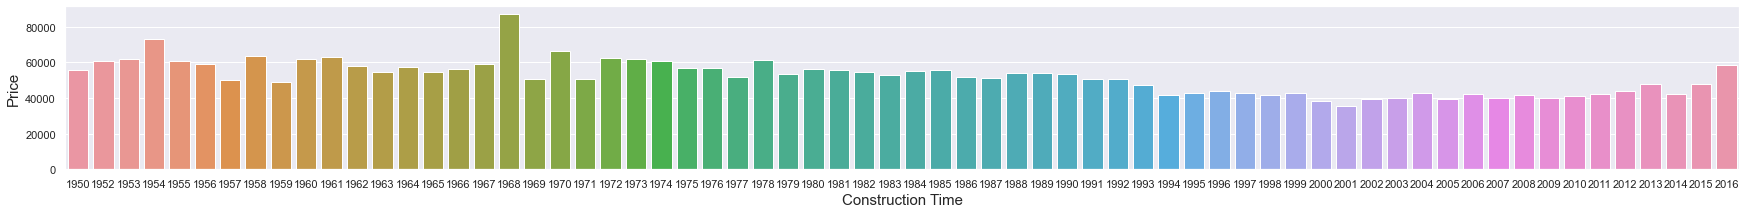

In [18]:
# Construction Time
plt.figure(figsize = (30,3))
ConstructionTime_price = df3.groupby('constructionTime').price.mean()
sns.barplot(x = ConstructionTime_price.index, y = ConstructionTime_price)

plt.xlabel("Construction Time", fontsize = 15)
plt.ylabel("Price", fontsize = 15)

Text(0, 0.5, 'Price')

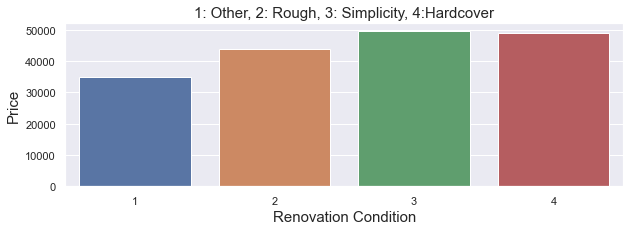

In [19]:
# Renovation Condition
fig = plt.figure(figsize = (10,3))
renovation_price = df3.groupby('renovationCondition').price.mean()
sns.barplot(x = renovation_price.index, y = renovation_price)

labels2 = "1: Other, 2: Rough, 3: Simplicity, 4:Hardcover"
plt.title(labels2, fontsize = 15)
plt.xlabel("Renovation Condition", fontsize = 15)
plt.ylabel("Price", fontsize = 15)